# Examen ADE Grupo 1

## Ejercicio 1

Estudiar si la siguiente serie es convergente o divergente y, en caso de convergencia, calcular la suma

$$
\sum_{n = 1}^{\infty} \frac{(-1)^{n - 1}}{2^n}
$$


<cite data-cite="granger2013">(Granger, 2013)</cite>

In [1]:
from sympy import *

# Define variables
n = Symbol('n')

# Define sum
asum = Sum(((-1)**(n - 1))/2**n, (n, 1, oo))

asum.doit()

1/3

En este caso la serie es convergente. Podemos estudiarla en los siguientes pasos:

1. Comprobar la condición necesaria de convergencia
$$
\lim_{n\rightarrow\infty} a_n = 0 \Rightarrow \lim_{n\rightarrow\infty} \left(\frac{-1}{2}\right)^n = 0
$$
2. Notar que es una serie alternada, ya que podemos expresarla como
$$
\sum_{n = 1}^{\infty} \frac{(-1)^{n - 1}}{2^n} = -\sum_{n = 1}^{\infty} (-1)^n \frac{1}{2^n}
$$
Una serie alternada es convergente si, y solo si, $\forall n\in\mathbb{N}, z_n \geq z_{n+1}$ y $\lim_{n\rightarrow\infty} z_n = 0$. Donde, en nuestro caso, $z_n = 1/2^n$

Se cumplen los requisitos de convergencia. Podemos escribirla como anteriormente
$$
\sum_{n = 1}^{\infty} \frac{(-1)^{n - 1}}{2^n} = -\sum_{n = 1}^{\infty} \left(\frac{-1}{2}\right)^n 
$$
y observamos que es una serie geométrica de razón $-1/2$, por lo tanto convergente. Aplicando la fórmula para las series geométricas, encontramos que el valor de la serie es $1/3$.


## Ejercicio 2

Calcular la siguiente integral impropia y contestar razonadamente si representa un área o no.

$$
\int^{\infty}_1 x e^{-2x} dx
$$

1. Calcular por partes. 
$$
\int^{\infty}_1 x e^{-2x} dx = \lim_{b\rightarrow\infty}\int^b_1 x e^{-2x} dx
$$

dejamos $u(x) = x$ y $v'(x) = e^{-2x}$. Nos hace falta calcular primero $v(x) = \int e^{-2x} dx$

In [2]:
x = Symbol('x')

integrate(exp(-2 * x))

-exp(-2*x)/2

2. La integral queda, una vez empleamos por partes:
$$
\int x e^{-2x} dx = -\frac{xe^{-2x}}{2} + \frac{1}{2}\int e^{-2x} dx
$$

Resolviendo la última integral y simplificando

In [3]:
integrate(x * exp(-2 * x))

(-2*x - 1)*exp(-2*x)/4

Ahora hay que calcular la integral impropia como tal, es decir, tenemos que calcular

$$
\int^{\infty}_1 xe^{-2x} dx = \lim_{b\rightarrow\infty} \int^b_1 xe^{-2x}dx = \lim_{b\rightarrow\infty} \frac{e^{-2x}(-2x-1)}{4}\Bigg\lvert^b_1
$$

Aplicando la Regla de Barrow, obtenemos
$$
\lim_{b\rightarrow\infty} \frac{e^{-2x}(-2x-1)}{4}\Bigg\lvert^b_1 = \lim_{b\rightarrow\infty} \frac{3}{4e^2} + \frac{e^{-2b}(-2b-1)}{4} = \lim_{b\rightarrow\infty} \frac{3}{4e^2} + \frac{(-2b-1)}{4e^{2b}} = \frac{3}{4e^2} 
$$

In [4]:
integrate(x * exp(-2 * x), (x, 1, oo))

3*exp(-2)/4

## Ejercicio 3

Estudiar la continuidad de la función $f(x)$. Indicar para cada punto de discontinuidad si la discontinuidad es evitable, de salto finito, o infinita.

$$
f(x) = \begin{cases}
    \frac{-x}{\lvert x - 2 \rvert} & x < 1 \\
    \frac{-2x}{3 - x} & x \geq 1
\end{cases}
$$

Hacemos plot de la función

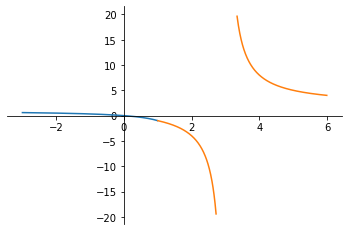

In [17]:
import matplotlib.pyplot as plt 
import numpy as np

fig = plt.figure(1) 
ax = fig.add_subplot(111) 

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
xx1 = np.arange(-3, 1, 0.01) 
xx2 = np.arange(1, 6, 0.01) 

# draw my curve 
f1 = (- x)/(abs(x - 2))
f2 = (- 2 * x)/(3 - x)
mf1 = sympify(f1)
mf2 = sympify(f2) 

mlf1 = lambdify(x, mf1, 'numpy')
mlf2 = lambdify(x, mf2, 'numpy')

ub, lb = 20, -20

fplot1 = mlf1(xx1)
fplot1[fplot1 > ub] = np.inf
fplot1[fplot1 < lb] = -np.inf

fplot2 = mlf2(xx2)
fplot2[fplot2 > ub] = np.inf
fplot2[fplot2 < lb] = -np.inf

ax.plot(xx1, fplot1) 
ax.plot(xx2, fplot2)

plt.show()

La función va a ser contínua en todo su dominio excepto en $x = 3$. Para demostrarlo:

1. La primera parte de $f(x)$ es contínua $\forall x\in\mathbb{R} : x \neq 2$ pero $x = 2$ no entra en la parte del dominio para esa función, por lo tanto no hay problemas.
2. La segunda parte de $f(x)$ es discontínua en $x = 3$. Tendremos que estudiar la discontinuidad en ese punto.
3. Por último, hay que estudiar qué ocurre en $x = 1$ donde se unen las dos funciones.

In [19]:
from IPython.display import display

lim1 = Limit(f1, x, 1, '-')
lim1r = Limit(f1, x, 1, '-').doit()

display(Eq(lim1, lim1r))

Eq(Limit(-x/Abs(x - 2), x, 1, dir='-'), -1)

In [21]:
lim2 = Limit(f2, x, 1, '+')
lim2r = Limit(f2, x, 1, '+').doit()

display(Eq(lim2, lim2r))

Eq(Limit(-2*x/(3 - x), x, 1), -1)

In [23]:
lim1 = Limit(f2, x, 3, '-')
lim1r = Limit(f2, x, 3, '-').doit()

display(Eq(lim1, lim1r))

Eq(Limit(-2*x/(3 - x), x, 3, dir='-'), -oo)

In [25]:
lim2 = Limit(f2, x, 3, '+')
lim2r = Limit(f2, x, 3, '+').doit()

display(Eq(lim2, lim2r))

Eq(Limit(-2*x/(3 - x), x, 3), oo)

La función es contínua en $x = 1$ y discontínua en $x = 3$. Como un límite lateral va a $-\infty$ y el otro a $+\infty$, la discontinuidad de $x = 3$ es de salto infinito.

## Ejercicio 4

Dado el sistema 

$$
\begin{cases}
x + y + z = 5 \\
2x - y + z = 2\lambda \\
-3x + 3y - z = \lambda
\end{cases}
$$

- Valores de $\lambda$ para que el sistema sea compatible.
- Valores de $\lambda$ para que el sistema sea compatible indeterminado.
- Valores de $\lambda$ para que el sistema sea compatible determinado.
- Resolver para el caso de compatible indeterminado.

In [27]:
x, y, z, ll = symbols('x y z \lambda')

A = Matrix([[1, 1, 1], [2, -1 , 1], [-3, 3, -1]])
b = Matrix([[5], [2 * ll], [ll]])
xv = Matrix([[x], [y], [z]])

display(Eq(MatMul(A, xv), b))

Eq(Matrix([
[ 1,  1,  1],
[ 2, -1,  1],
[-3,  3, -1]])*Matrix([
[x],
[y],
[z]]), Matrix([
[        5],
[2*\lambda],
[  \lambda]]))

In [29]:
print(f'The determinant of matrix A is {A.det()}')
print(f'The rank of matrix A is {A.rank()}')

The determinant of matrix A is 0
The rank of matrix A is 2


Por lo tanto, el sistema no puede ser compatible determinado para ningún valor de $\lambda$. El sistema será compatible cuando $rk([A, b]) = 2$, es decir, cuando el vector $b$ sea una combinación lineal de los vectores en $A$.

In [31]:
 Ab = A.col_insert(3, b)
 Ab

Matrix([
[ 1,  1,  1,         5],
[ 2, -1,  1, 2*\lambda],
[-3,  3, -1,   \lambda]])

In [33]:
Ab.echelon_form()

Matrix([
[1,  1,  1,               5],
[0, -3, -1,  2*\lambda - 10],
[0,  0,  0, 15 - 15*\lambda]])

To get $[A, b]$ in row-echelon form, perform the following operations:

1. $F_3 = F_3 + 3F_1$
2. $F_2 = F_2 - 2F_1$
3. $F_3 = F_3 + 2F_2$

And we get the previous matrix.

The rank of $[A, b]$ is equal to $2$ iff $\lambda = 1$, since the last row would not have elements distinct from $0$.

Resumen:

1. Para $\lambda = 1$ el sistema es compatible.
2. Para $\lambda = 1$ el sistema es compatible indeterminado.
3. El sistema **no** es compatible determinado para ningún valor de $\lambda$.
4. La solución para el sistema cuando es compatible indeterminado es:

In [35]:
linsolve(Ab.subs(ll, 1), x, y, z)

FiniteSet((7/3 - 2*z/3, 8/3 - z/3, z))

## Ejercicio 5

Dada $f(x) = (x+2)(x-3)^2$

1. Calcular zonas de crecimiento y decrecimiento, y los máximos y mínimos locales, si los hay.
2. Calcular zonas de concavidad y convexidad y los puntos de inflexión, si los hay.
3. Calcular los puntos de corte con los ejes y los límites cuando $x\rightarrow\pm\infty$. 
4. Representar gráficamente la función.

Primero calculamos la derivada que es igual a

In [37]:
x = Symbol('x')
fx = (x + 2) * (x - 3)**2
fprime = Derivative(fx, x)
fprime.doit().expand()

3*x**2 - 8*x - 3

Vemos donde la derivada se hace $0$

In [39]:
solveset(Eq(fprime.doit(), 0), x).doit()

FiniteSet(-1/3, 3)

Para $x = \frac{-1}{3}$ y $x = 3$ la derivada es $0$. Tenemos que comprobar el signo de la derivada en los intervalos:

- $(-\infty, \frac{-1}{3})$
- $(\frac{-1}{3}, 3)$
- $(3, +\infty)$

In [41]:
fprime.doit().subs(x, -2/3)

3.66666666666666

In [43]:
fprime.doit().subs(x, 0)

-3

In [44]:
fprime.doit().subs(x, 4)

13

Como la derivada es positiva en el intervalo $\left(-\infty, \frac{-1}{3}\right)\cup\left(3, +\infty\right)$, la función es creciente en ellos. Como la derivada es negativa en el intervalo $\left(\frac{-1}{3}, 3\right)$ la función decrece en el intervalo.

Para ver dónde hay máximos o mínimos, tenemos que ver dónde la derivada es $0$, que ya lo hemos calculado. Como la función es creciente hasta $-1/3$ y luego decrece, hay un máximo en $x = -1/3$ y, por el mismo razonamiento, hay un mínimo en $x = 3$.

**Calcular convexidad/concavidad**

Calculamos la segunda derivada y la igualamos a $0$ para obtener

In [45]:
fp2 = diff(fx, x, 2)
solveset(Eq(fp2, 0), x)

FiniteSet(4/3)

In [46]:
fp2.subs(x, 0)

-8

In [47]:
fp2.subs(x, 5)

22

Como la segunda derivada es negativa desde $\left(-\infty, 4/3\right)$ y positiva desde $(4/3, \infty)$, la función es cóncava en el primer intervalo y convexa en el segundo. 

**Puntos de corte con los ejes**

Para calcular los puntos de corte, tenemos que calcular $f(0)$ y $f(x) = 0$.

In [48]:
fx.subs(x, 0)

18

Punto de corte con el eje $y$, es $(0, 18)$.

In [49]:
solveset(Eq(fx, 0), x)

FiniteSet(-2, 3)

Puntos de corte con el eje $x$ son $(-2, 0)$ y $(3, 0)$.

**Límites**

In [50]:
limit(fx, x, oo)

oo

In [51]:
limit(fx, x, -oo)

-oo

**Representación gráfica**

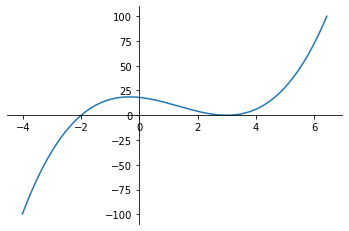

In [52]:
fig = plt.figure() 
ax = fig.add_subplot(111) 

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
xx = np.arange(-5, 8, 0.01) 

# draw my curve 
mf1 = sympify(fx)
mlf1 = lambdify(x, mf1, 'numpy')

ub, lb = 100, -100

fplot = mlf1(xx)
fplot[fplot > ub] = np.inf
fplot[fplot < lb] = -np.inf

ax.plot(xx, fplot) 

plt.show()